In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import scipy.stats as st
import matplotlib.mlab as mlab
import math
%matplotlib inline

In [2]:
def bootstrap(arr,n_boots):
    '''
    variables:
        arr = the data that we are random sampling from
        n_boots = the number of bootstraps we want to make
    
    returns:
        list of lists containing the number of bootstrap
        samples we wanted to make
    '''
    return np.array([resample(arr) for _ in xrange(n_boots)])

In [88]:
def split_into_treatment_groups_and_take_means(arr):
    '''
    variables:
        arr = an array of bootstrap samples
    
    returns:
        flip = an array of the means of the flipped treatment
        traditional = an array of the means of the traditional treatment
    '''
    flip = []
    traditional = []
    for boot in xrange(len(arr)):
        x = pd.DataFrame(arr[boot])
        
        f = x[x[0] == 'F']
        t = x[x[0] == 'T']
        
        f = np.array(f[1]).mean()
        t = np.array(t[1]).mean()
        
        flip.append(f)
        traditional.append(t)
    return np.array(flip), np.array(traditional)

In [143]:
def split_into_teacher_groups_and_take_means(arr):
    '''
    variables:
        arr = an array of bootstrap samples
    
    returns:
        ins_2 = an array of the means for Instructor 2
        ins_5 = an array of the means for Instructor 5
        ins_6 = an array of the means for Instructor 6
    '''
    ins_2 = []
    ins_5 = []
    ins_6 = []
    for boot in xrange(len(arr)):
        x = pd.DataFrame(arr[boot])
        
        a = x[x[0] == 2]
        b = x[x[0] == 5]
        c = x[x[0] == 6]
        
        a = np.array(a[1]).mean()
        b = np.array(b[1]).mean()
        c = np.array(c[1]).mean()
        
        ins_2.append(a)
        ins_5.append(b)
        ins_6.append(c)
    return np.array(ins_2), np.array(ins_5), np.array(ins_6)

In [115]:
df_original = pd.read_csv('data/Grades-Table 1.csv')

### From here we will be comparing the means of final grades between Flip Class and Traditional Class

In [116]:
df = df_original[['Treatment', 'FINAL_RAW_BASE_GRADE']] # this is the only part of the data that we want for this

In [122]:
bootstrap_samples = bootstrap(np.array(df),10000) # these are our bootstrap samples

In [123]:
f_boot_means, t_boot_means = \
                    split_into_treatment_groups_and_take_means(bootstrap_samples) # the means of the bootstrap samples

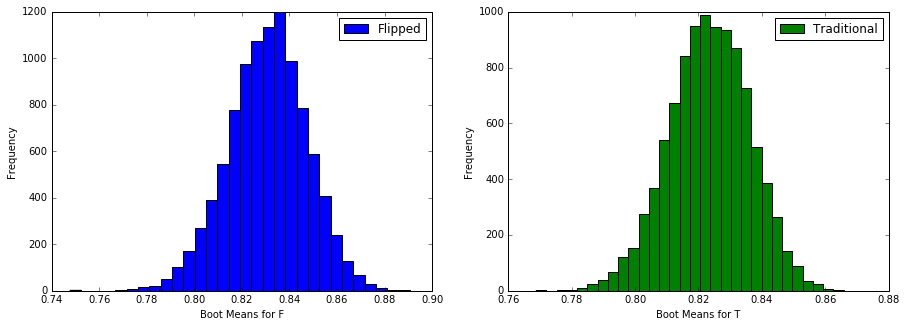

In [124]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(f_boot_means, bins = 30, label = 'Flipped')
plt.xlabel('Boot Means for F')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(122)
plt.hist(t_boot_means, bins = 30, color = 'g', label = 'Traditional')
plt.xlabel('Boot Means for T')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [125]:
f_mean = f_boot_means.mean() # the mean of the F bootstrap sample means
t_mean = t_boot_means.mean() # the mean of the T bootstrap sample means

t_std = t_boot_means.std() / np.sqrt(len(t_boot_means)) # std for central limit therom

z_t = (f_mean - t_mean) / t_std # z score

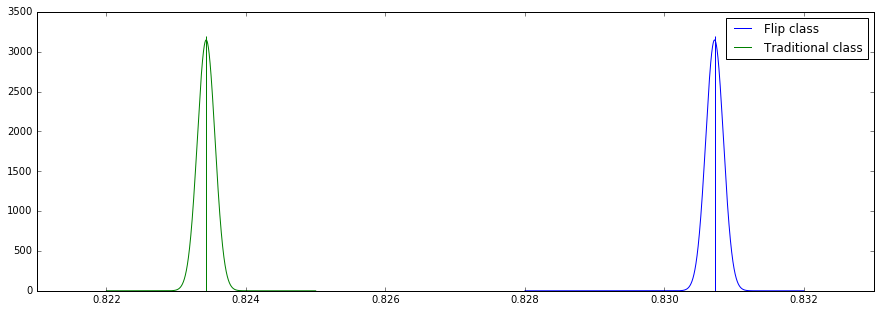

In [134]:
plt.figure(figsize=(15,5))

x_f = np.linspace(.828, .832, 2000)
plt.plot(x_f, mlab.normpdf(x_f, f_mean, t_std), label = 'Flip class')
plt.vlines(f_mean, 0, 3200, color = 'b')

x_t = np.linspace(.822, .825, 2000)
plt.plot(x_t, mlab.normpdf(x_t, t_mean, t_std), color = 'g', label = 'Traditional class')
plt.vlines(t_mean, 0, 3200, color = 'g')

plt.legend()
plt.xlim(.821, .833)
plt.ylim(0, 3500)
plt.show()

In [127]:
print "    Flipped Class Final Grade mean:", f_mean
print "Traditional Class Final Grade mean:", t_mean
print "            Z - score for A/B test:", z_t

    Flipped Class Final Grade mean: 0.830718728856
Traditional Class Final Grade mean: 0.823429848871
            Z - score for A/B test: 57.4986865886


We have to be very carful with the interpretation of the above graph, the z-score (it's about 57) and the acompanying p-value which is basically 0.0. The bootstrapping procedure has allowed us to do a few usful things. It allowed us to use the Central Limit Therom (CLT) and then compute a z-score instead of a t-test, which is great. Because of the CLT we can say that our findings are not just a fluke; the Flipped class did produce a better final grade than the Traditional class and this relationship would hold if we applied this to the population, not just the sample population that is your class that you experimented on.

The catch is, that with a mean of about 83% and 82% do your findings matter? I say NO, it doesn't matter. You had already come to this conclusion before I did any of this but now you have a good statistical way of saying this.

One last thing, I will talk to one of my teachers next week and make sure everything I have done above is within best practices and make sure the paragraphs I just wrote are the correct interpretation. I want to make sure I'm completely explicit with this interpretation; let's make sure we don't lie with statistics.

### Here we'll compare teachers

In [139]:
df_teachers = \
        df_original[['Instructor', 'FINAL_RAW_BASE_GRADE']] # this is the only part of the data that we want for this

In [141]:
teacher_bootstrap_samples = bootstrap(np.array(df_teachers),10000) # these are our bootstrap samples

In [145]:
boot_means_2, boot_means_5, boot_means_6 = \
            split_into_teacher_groups_and_take_means(teacher_bootstrap_samples) # the means of the bootstrap samples

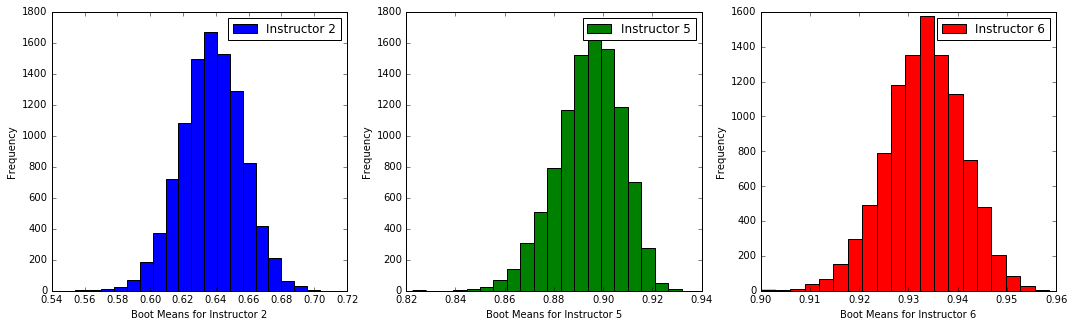

In [146]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(boot_means_2, bins = 20, label = 'Instructor 2')
plt.xlabel('Boot Means for Instructor 2')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(132)
plt.hist(boot_means_5, bins = 20, color = 'g', label = 'Instructor 5')
plt.xlabel('Boot Means for Instructor 5')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(133)
plt.hist(boot_means_6, bins = 20, color = 'r', label = 'Instructor 6')
plt.xlabel('Boot Means for Instructor 6')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [147]:
mean_2 = boot_means_2.mean() # the mean of the Instructor 2 bootstrap sample means
mean_5 = boot_means_5.mean() # the mean of the Instructor 5 bootstrap sample means
mean_6 = boot_means_6.mean() # the mean of the Instructor 6 bootstrap sample means

std_2 = boot_means_2.std() / np.sqrt(len(boot_means_2)) # std for central limit therom 2
std_5 = boot_means_5.std() / np.sqrt(len(boot_means_5)) # std for central limit therom 5
std_6 = boot_means_6.std() / np.sqrt(len(boot_means_6)) # std for central limit therom 6

z_2_5 = (mean_2 - mean_5) / std_2
z_2_6 = (mean_2 - mean_6) / std_2
z_5_6 = (mean_5 - mean_6) / std_5

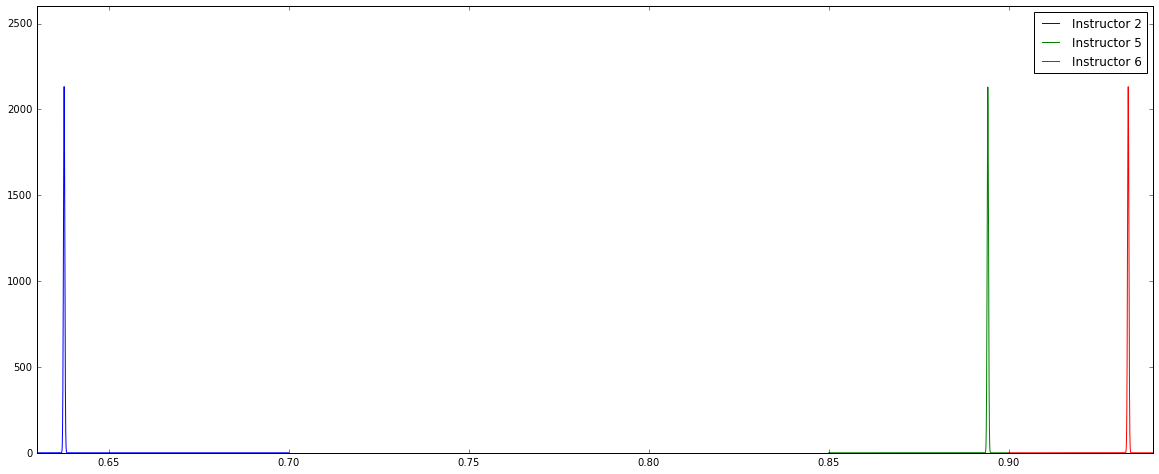

In [151]:
plt.figure(figsize=(20,8))

x_2 = np.linspace(.6, .7, 2000)
plt.plot(x_2, mlab.normpdf(x_2, mean_2, std_2), label = 'Instructor 2')
#plt.vlines(mean_2, 0, 700, color = 'b') # .6377

x_5 = np.linspace(.85, .9, 2000)
plt.plot(x_5, mlab.normpdf(x_5, mean_5, std_2), color = 'g', label = 'Instructor 5')
#plt.vlines(mean_5, 0, 700, color = 'g')

x_6 = np.linspace(.9, .94, 2000)
plt.plot(x_6, mlab.normpdf(x_6, mean_6, std_2), color = 'r', label = 'Instructor 6')
#plt.vlines(mean_6, 0, 700, color = 'r')

plt.legend()
plt.xlim(.63, .94)
plt.ylim(0, 2600)
plt.show()

In [152]:
print mean_2
print mean_5
print mean_6

0.637619008158
0.894206061963
0.933201202293


# Let's run a Linear Regression and see what the import features are

### To do this we will need to do some feature engineering

In [158]:
df_demographics = pd.read_csv('data/Demographics-Table 1.csv')

In [159]:
# this is the merged dataframe with the demographics table and the grades table
df_merged = df_original.merge(df_demographics, left_on = 'SECTION_INSTRUCTOR_TIME_TREATMENT_STUDENT', \
                                                right_on = 'SECTION_INSTRUCTOR_TIME_TREATMENT_STUDENT', how = 'outer')

In [160]:
df_merged = df_merged[np.isfinite(df_merged['Instructor'])] # drops students that weren't in the Grades table

In [161]:
df_merged = df_merged[np.isfinite(df_merged['Age'])] # drops students that weren't in the Demographics table

In [162]:
df_merged.reset_index(drop=True, inplace=True) # just resets the indexes after all that dropping